In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno


import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv(r'..\999_동영상 연습예제\1장\titanic\train.csv')
test_df = pd.read_csv(r'..\999_동영상 연습예제\1장\titanic\test.csv')

In [3]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
train_df.shape

(891, 12)

In [5]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"McEvoy, Mr. Michael",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"McEvoy, Mr. Michael",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
train_df.columns[3:5]

Index(['Name', 'Sex'], dtype='object')

In [10]:
ntrain = train_df.shape[0]
ntest = test_df.shape[0]

In [11]:
print(ntrain) ; print(ntest)

891
418


In [12]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
y_train = train_df['Survived'].values

In [14]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
passId = test_df['PassengerId']

In [16]:
data = pd.concat((train_df, test_df))

In [17]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [18]:
data.shape

(1309, 12)

In [19]:
data = pd.concat((train_df, test_df))

In [20]:
data.shape

(1309, 12)

In [21]:
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [22]:
data['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

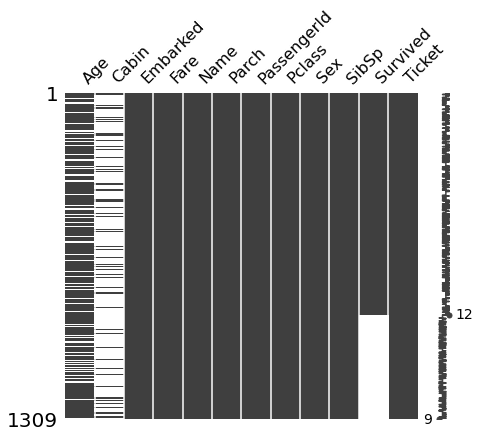

In [23]:
missingno.matrix(data, figsize=(7,6))

In [24]:
data.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [26]:
data.isnull().any()

Age             True
Cabin           True
Embarked        True
Fare            True
Name           False
Parch          False
PassengerId    False
Pclass         False
Sex            False
SibSp          False
Survived        True
Ticket         False
dtype: bool

In [27]:
data.isnull().any().any()

True

In [28]:
data.Age.isnull().any()

True

In [29]:
data.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket'],
      dtype='object')

In [30]:
corr = data.corr()

In [31]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(14,8))


<Figure size 1008x576 with 0 Axes>

<Figure size 1008x576 with 0 Axes>

In [32]:
mask

array([[ True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True],
       [False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False,  True]])

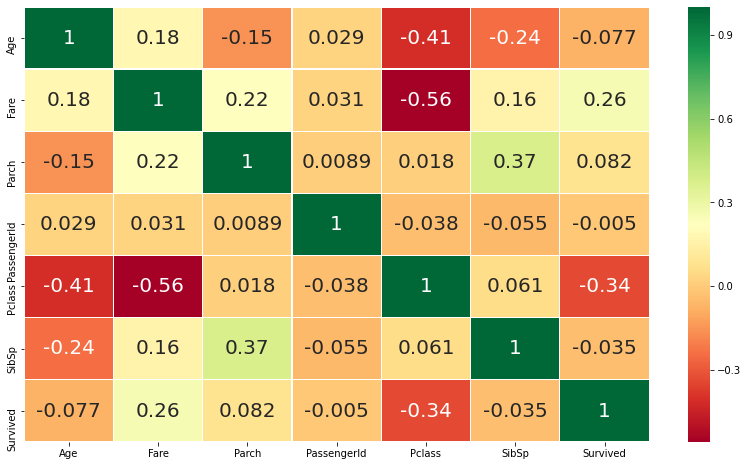

In [33]:
plt.figure(figsize=(14,8))
sns.heatmap(corr, annot=True, cmap='RdYlGn', linewidths = 0.2, annot_kws={'size':20})

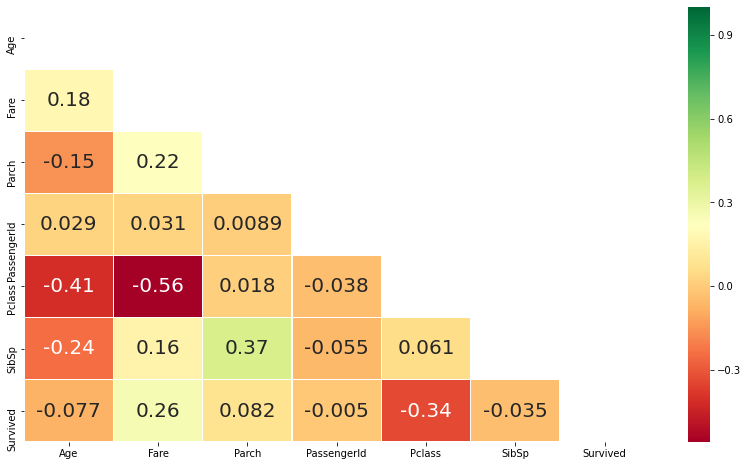

In [34]:
corr = data.corr()


plt.figure(figsize=(14,8))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=True, annot_kws={'size':20}, cmap='RdYlGn', linewidths=0.2 )

In [35]:
mask

array([[ True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True],
       [False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False,  True]])

In [36]:
np.triu_indices_from(mask)

(array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3,
        4, 4, 4, 5, 5, 6], dtype=int64),
 array([0, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 3, 4, 5, 6,
        4, 5, 6, 5, 6, 6], dtype=int64))

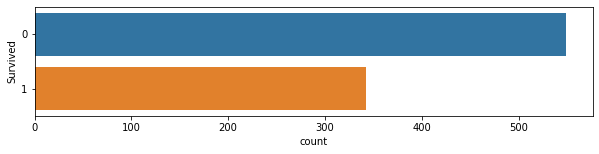

In [37]:
fig = plt.figure(figsize=(10,2))
sns.countplot(y='Survived', data=train_df)

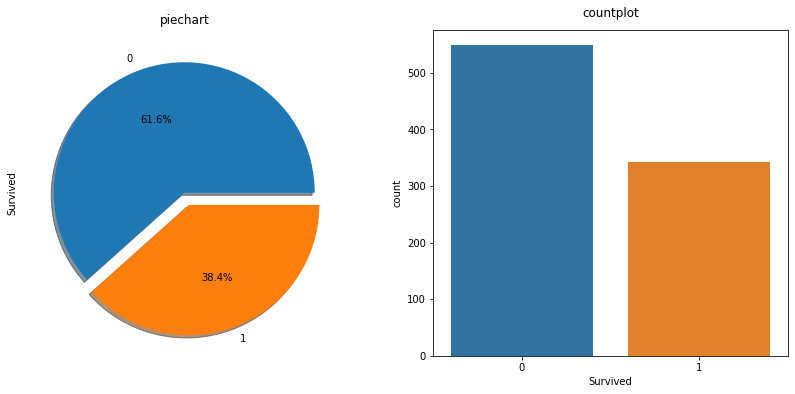

In [38]:
f, ax = plt.subplots(1,2, figsize=(14,6))
train_df['Survived'].value_counts().plot.pie(ax=ax[0], autopct='%1.1f%%', explode=[0,0.1], shadow=True)
ax[0].set_title('piechart')
sns.countplot('Survived', data=train_df, ax=ax[1])
ax[1].set_title('countplot', y=1.02)

plt.show()

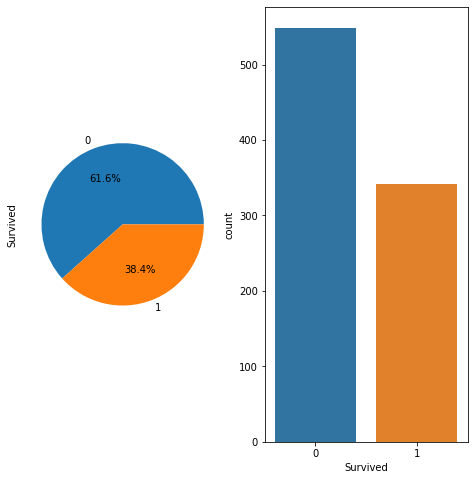

In [39]:
f, ax = plt.subplots(1,2, figsize=(8,8))
train_df['Survived'].value_counts().plot.pie(ax=ax[0], autopct='%1.1f%%')
sns.countplot('Survived', data=train_df)

In [40]:
def piecount(col):
    f, ax = plt.subplots(1,2, figsize=(13,5))
    train_df[col].value_counts().plot.pie(ax=ax[0], autopct='%1.1f%%', shadow=True)
    sns.countplot(col, data=train_df)
    plt.show()

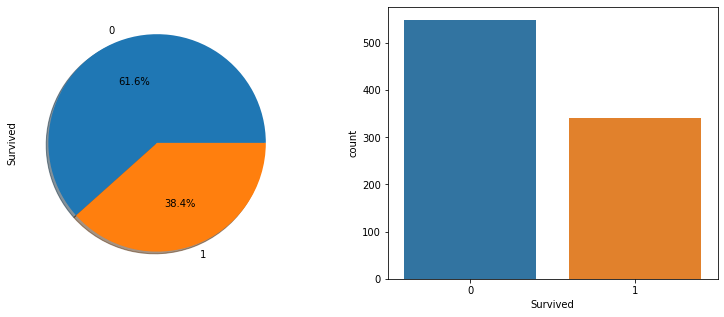

In [41]:
piecount('Survived')

In [42]:
train_df.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [43]:
pd.crosstab(train_df['Pclass'], train_df['Survived'], margins=True).style.background_gradient(cmap='winter_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


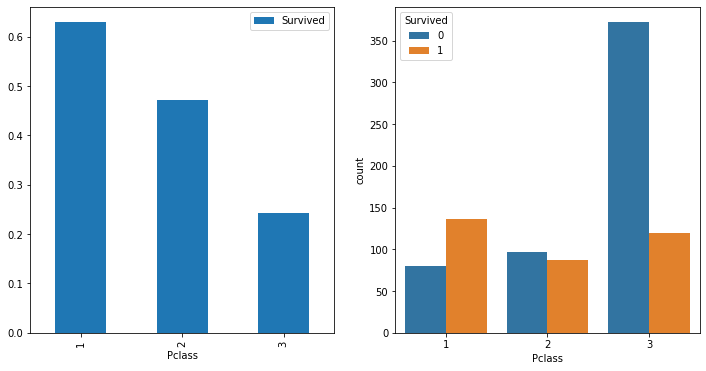

In [44]:
f, ax = plt.subplots(1,2, figsize=(12,6))
train_df[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar(ax=ax[0])
sns.countplot('Pclass', hue='Survived', data = train_df, ax=ax[1])
plt.show()

In [45]:
train_df[['Pclass','Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


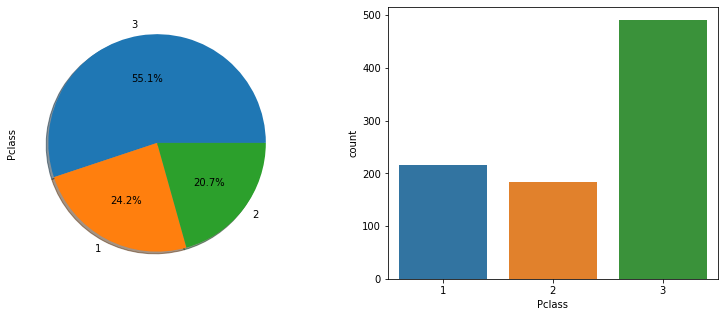

In [46]:
piecount("Pclass")

In [47]:
data['Name'].value_counts()

Connolly, Miss. Kate                               2
Kelly, Mr. James                                   2
Turcin, Mr. Stjepan                                1
Ware, Mrs. John James (Florence Louise Long)       1
Vander Planke, Miss. Augusta Maria                 1
Fry, Mr. Richard                                   1
Cardeza, Mr. Thomas Drake Martinez                 1
Carlsson, Mr. Frans Olof                           1
Chisholm, Mr. Roderick Robert Crispin              1
Soholt, Mr. Peter Andreas Lauritz Andersen         1
Strom, Miss. Telma Matilda                         1
Andersson, Master. Sigvard Harald Elias            1
Rekic, Mr. Tido                                    1
Hoyt, Mr. William Fisher                           1
Turja, Miss. Anna Sofia                            1
Smart, Mr. John Montgomery                         1
Cor, Mr. Bartol                                    1
West, Miss. Constance Mirium                       1
Clarke, Mrs. Charles V (Ada Maria Winfield)   

In [48]:
temp = data.copy()
temp['Initial'] = 0
temp['Initial'] = data['Name'].str.extract('([A-Za-z0-9]+)\.')
temp['Initial'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Mlle          2
Major         2
Ms            2
Sir           1
Jonkheer      1
Mme           1
Capt          1
Lady          1
Don           1
Dona          1
Countess      1
Name: Initial, dtype: int64

In [49]:
pd.crosstab(temp['Initial'], temp['Survived'], margins=True).T.style.background_gradient(cmap='winter_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,All
Survived,,,,,,,,,,,,,,,,,,
0.0,1,1,0,1,4,1,0,1,17,55,0,0,436,26,0,6,0,549
1.0,0,1,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,342
All,1,2,1,1,7,1,1,2,40,182,2,1,517,125,1,6,1,891


In [50]:
temp.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Initial
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


In [51]:
train_df.groupby(['Pclass', 'Survived'])['Survived'].count().to_frame().style.background_gradient('winter_r')

In [52]:
print(data['Age'].min())
print(data['Age'].max())
print(data['Age'].mean())


0.17
80.0
29.881137667304014


In [53]:
import math

In [54]:
math.ceil(0.5)

1

In [55]:
math.floor(0.5)

0

In [56]:
max('cherolet')

't'

In [57]:
min('cherolet')

'c'

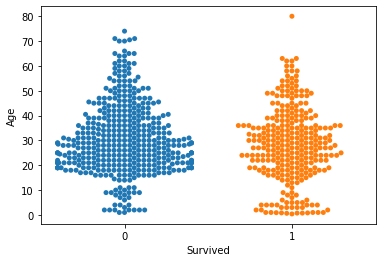

In [58]:
sns.swarmplot(x='Survived', y='Age', data=train_df)

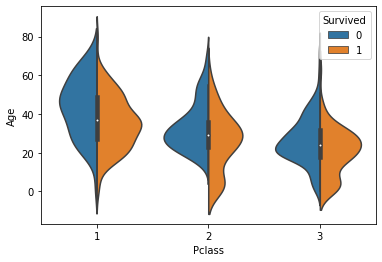

In [59]:
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=train_df, split=True)

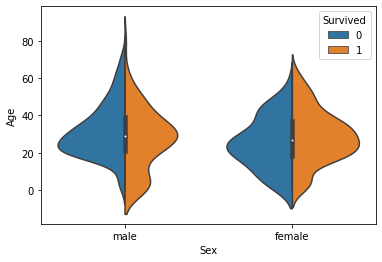

In [60]:
sns.violinplot(data=train_df, x='Sex', y='Age', hue='Survived', split=True)

In [61]:
temp.groupby('Initial').agg({'Age':['mean', 'count']})

Age      
               mean count
Initial                  
Capt      70.000000     1
Col       54.000000     4
Countess  33.000000     1
Don       40.000000     1
Dona      39.000000     1
Dr        43.571429     7
Jonkheer  38.000000     1
Lady      48.000000     1
Major     48.500000     2
Master     5.482642    53
Miss      21.774238   210
Mlle      24.000000     2
Mme       24.000000     1
Mr        32.252151   581
Mrs       36.994118   170
Ms        28.000000     1
Rev       41.250000     8
Sir       49.000000     1

In [62]:
temp = temp.reset_index(drop=True)

In [63]:
temp.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Initial
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


In [64]:
temp['Age'] = temp.groupby('Initial')['Age'].apply(lambda x: x.fillna(x.mean()))

In [65]:
temp.groupby('Initial')['Age'].mean()

Initial
Capt        70.000000
Col         54.000000
Countess    33.000000
Don         40.000000
Dona        39.000000
Dr          43.571429
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       5.482642
Miss        21.774238
Mlle        24.000000
Mme         24.000000
Mr          32.252151
Mrs         36.994118
Ms          28.000000
Rev         41.250000
Sir         49.000000
Name: Age, dtype: float64

In [66]:
temp['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [67]:
a = lambda x, y : x**y

In [68]:
a(2,3)

8

In [69]:
sample1 = lambda x,y,z : x+y+z
sample1(1,2,3)

6

In [70]:
def sample1(x,y,z,d):
    n = x+y+z+d
    print(n)

In [71]:
sample1(1,2,3,4)

10


In [72]:
z = (lambda x,y : x+y) (10,20)

In [73]:
z

30

In [74]:
for num in range(1,3):
    if num % 2 == 0 :
        print(num)
        continue
    if num % 2 == 1 :
        print(num)
        continue

print ((lambda x, y: x if x % 2 == 0 else y)(1,2))
print((lambda x, y : x if x % 2 == 1 else y) (1,2))

mylist = list(range(1,3))
print(list(filter(lambda n:n % 2 == 0, mylist)))
print(list(filter(lambda n:n % 2 == 1, mylist)))
print([filter(lambda n:n % 2 == 1, mylist)])

1
2
2
1
[2]
[1]


In [75]:
temp['Initial'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dona' , 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master',  'Miss'  ,'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir'], ['Sacrificed', 'Respected', 'Nobles', 'Mr', 'Mrs', 'Respected', 'Mr', 'Nobles', 'Respected', 'Kids', 'Miss', 'Nobles', 'Nobles', 'Mr', 'Mrs', 'Nobles', 'Sacrificed', 'Nobles'],inplace=True)
temp['Initial'].replace(['Kids', 'Miss', 'Mr', 'Mrs', 'Nobles', 'Respected', 'Sacrificed'], [4, 4, 2, 5, 6, 3, 1], inplace=True)

In [76]:
temp['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [77]:
temp['Age_Range'] = pd.qcut(temp['Age'], 10)

In [78]:
def survpct(col):
    return temp.groupby(col)['Survived'].mean()

In [79]:
survpct('Age_Range')

Age_Range
(0.169, 16.0]     0.548077
(16.0, 21.0]      0.307692
(21.0, 23.0]      0.487179
(23.0, 26.0]      0.369863
(26.0, 30.0]      0.400000
(30.0, 32.252]    0.198718
(32.252, 33.0]    0.411765
(33.0, 39.0]      0.504762
(39.0, 48.0]      0.357143
(48.0, 80.0]      0.387500
Name: Survived, dtype: float64

In [80]:
temp.groupby('Age_Range')['Survived'].mean()

Age_Range
(0.169, 16.0]     0.548077
(16.0, 21.0]      0.307692
(21.0, 23.0]      0.487179
(23.0, 26.0]      0.369863
(26.0, 30.0]      0.400000
(30.0, 32.252]    0.198718
(32.252, 33.0]    0.411765
(33.0, 39.0]      0.504762
(39.0, 48.0]      0.357143
(48.0, 80.0]      0.387500
Name: Survived, dtype: float64

In [81]:
temp['Agroup'] = 0

temp.loc[temp['Age'] < 1.0, 'Agroup'] = 1
temp.loc[(temp['Age'] >=1.0) & (temp['Age'] <= 3.0), 'Agroup'] = 2
temp.loc[(temp['Age'] > 3.0) & (temp['Age'] < 11.0), 'Agroup'] = 7
temp.loc[(temp['Age'] >= 11.0) & (temp['Age'] < 15.0), 'Agroup'] = 13
temp.loc[(temp['Age'] >= 15.0) & (temp['Age'] < 18.0), 'Agroup'] = 16
temp.loc[(temp['Age'] >= 18.0) & (temp['Age'] <=  20.0), 'Agroup'] = 18
temp.loc[(temp['Age'] > 20.0) & (temp['Age'] <= 22.0), 'Agroup'] = 21
temp.loc[(temp['Age'] > 22.0) & (temp['Age'] <= 26.0), 'Agroup'] = 24
temp.loc[(temp['Age'] > 26.0) & (temp['Age'] <= 30.0), 'Agroup'] = 28
temp.loc[(temp['Age'] > 30.0) & (temp['Age'] <= 32.0), 'Agroup'] = 31
temp.loc[(temp['Age'] > 32.0) & (temp['Age'] <= 34.0), 'Agroup'] = 33
temp.loc[(temp['Age'] > 34.0) & (temp['Age'] <= 38.0), 'Agroup'] = 36
temp.loc[(temp['Age'] > 38.0) & (temp['Age'] <= 52.0), 'Agroup'] = 45
temp.loc[(temp['Age'] > 52.0) & (temp['Age'] <= 75.0), 'Agroup'] = 60
temp.loc[temp['Age'] > 75.0, 'Agroup'] = 78

In [82]:
temp.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Initial,Age_Range,Agroup
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,2,"(21.0, 23.0]",21
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,5,"(33.0, 39.0]",36
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,4,"(23.0, 26.0]",24
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,5,"(33.0, 39.0]",36
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,2,"(33.0, 39.0]",36


In [83]:
temp.loc[(temp['Sex'] == 'male'),'Sex'] = 1

In [84]:
temp.loc[(temp['SibSp'] == 0) & (temp['Parch'] == 0), 'Alone'] = 1

In [85]:
temp.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Initial,Age_Range,Agroup,Alone
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,2,"(21.0, 23.0]",21,NaN
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,5,"(33.0, 39.0]",36,NaN
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,4,"(23.0, 26.0]",24,1.0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,5,"(33.0, 39.0]",36,NaN
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,2,"(33.0, 39.0]",36,1.0


In [86]:
pd.crosstab([temp.Embarked, temp.Survived], temp.Pclass, margins=True).style.background_gradient(cmap='winter_r')

In [87]:
temp['Initick'] = temp['Ticket'].str.extract('^([A-Za-z0-9]+)')

In [88]:
temp = temp.reset_index(drop=True)

In [89]:
temp.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Initial,Age_Range,Agroup,Alone,Initick
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,2,"(21.0, 23.0]",21,NaN,A
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,5,"(33.0, 39.0]",36,NaN,PC
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,4,"(23.0, 26.0]",24,1.0,STON
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,5,"(33.0, 39.0]",36,NaN,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,2,"(33.0, 39.0]",36,1.0,373450


In [90]:
temp['Initick'] = temp.Ticket.str.extract('^([A-Za-z]+)')

In [91]:
temp.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Initial,Age_Range,Agroup,Alone,Initick
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,2,"(21.0, 23.0]",21,NaN,A
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,5,"(33.0, 39.0]",36,NaN,PC
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,4,"(23.0, 26.0]",24,1.0,STON
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,5,"(33.0, 39.0]",36,NaN,NaN
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,2,"(33.0, 39.0]",36,1.0,NaN


In [92]:
temp['NumTicket'] = temp['Initick'].factorize()[0]

In [93]:
temp['Initick'].factorize()

(array([ 0,  1,  2, ..., 10, -1, -1], dtype=int64),
 Index(['A', 'PC', 'STON', 'PP', 'C', 'SC', 'S', 'CA', 'SO', 'W', 'SOTON', 'Fa',
        'LINE', 'F', 'SW', 'SCO', 'P', 'WE', 'AQ', 'LP'],
       dtype='object'))

In [94]:
temp['Initick'].value_counts()

PC       92
C        55
A        40
SOTON    27
SC       25
STON     22
CA       22
S        21
W        17
F        12
LINE      4
PP        4
P         2
AQ        2
WE        2
SO        1
LP        1
Fa        1
SW        1
SCO       1
Name: Initick, dtype: int64

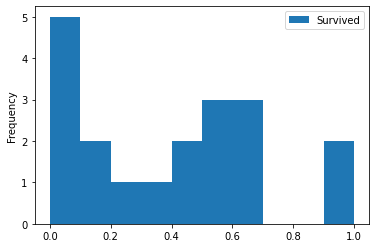

In [95]:
temp.groupby('NumTicket')['Survived'].mean().to_frame().plot(kind='hist')

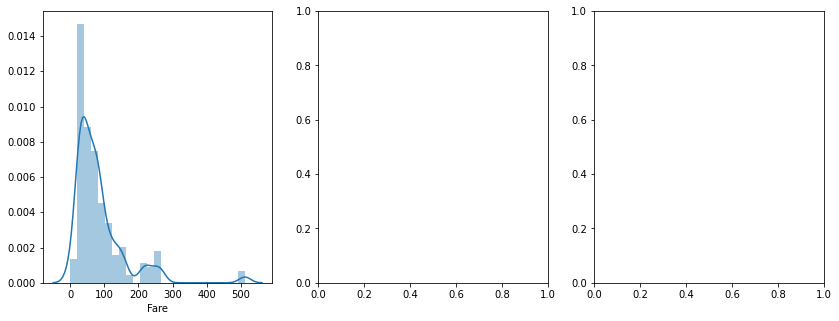

In [96]:
f, ax = plt.subplots(1,3, figsize=(14,5))
sns.distplot(train_df[train_df['Pclass'] == 1]['Fare'], ax=ax[0])

In [97]:
temp['Fare_Range'] = pd.qcut(train_df['Fare'], 10)

In [98]:
def groupmean(a,b):
    return temp.groupby([a])[b].mean().to_frame().style.background_gradient(cmap='winter_r')

In [99]:
groupmean('Fare_Range', 'Survived')

,Survived
Fare_Range,
"(-0.001, 7.55]",0.141304
"(7.55, 7.854]",0.298851
"(7.854, 8.05]",0.179245
"(8.05, 10.5]",0.230769
"(10.5, 14.454]",0.428571
"(14.454, 21.679]",0.420455
"(21.679, 27.0]",0.516854
"(27.0, 39.688]",0.373626
"(39.688, 77.958]",0.52809


In [100]:
temp['Fgroup'] = 0

temp.loc[temp['Fare'] <= 0,'Fgroup'] = 0
temp.loc[(temp['Fare'] > 0) & (temp['Fare'] <= 7.125), 'Fgroup'] = 1
temp.loc[(temp['Fare'] > 7.125) & (temp['Fare'] <= 7.9), 'Fgroup'] = 2
temp.loc[(temp['Fare'] > 7.9) & (temp['Fare'] <= 8.03), 'Fgroup'] = 3
temp.loc[(temp['Fare'] > 8.03) & (temp['Fare'] < 10.5), 'Fgroup'] = 4
temp.loc[(temp['Fare'] >= 10.5) & (temp['Fare'] < 23.0), 'Fgroup'] = 5
temp.loc[(temp['Fare'] >= 23.0) & (temp['Fare'] <= 27.8), 'Fgroup'] = 6
temp.loc[(temp['Fare'] > 27.8) & (temp['Fare'] <= 51.0), 'Fgroup'] = 7
temp.loc[(temp['Fare'] > 51.0) & (temp['Fare'] <= 73.5), 'Fgroup'] = 8
temp.loc[temp['Fare'] > 73.5, 'Fgroup'] = 9

temp.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Initial,Age_Range,Agroup,Alone,Initick,NumTicket,Fare_Range,Fgroup
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,2,"(21.0, 23.0]",21,NaN,A,0,"(-0.001, 7.55]",2
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,5,"(33.0, 39.0]",36,NaN,PC,1,"(39.688, 77.958]",8
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,4,"(23.0, 26.0]",24,1.0,STON,2,"(7.854, 8.05]",3
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,5,"(33.0, 39.0]",36,NaN,NaN,-1,"(39.688, 77.958]",8
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,2,"(33.0, 39.0]",36,1.0,NaN,-1,"(7.854, 8.05]",4


In [107]:
temp['Inicab'] = 0
temp['Inicab'] = temp['Cabin'].str.extract('^([A-Za-z]+)')
temp.loc[((temp['Cabin'].isnull()) & (temp['Pclass'].values == 1)), 'Inicab'] = 'X'
temp.loc[((temp['Cabin'].isnull()) & (temp['Pclass'].values == 2)), 'Inicab'] = 'Y'
temp.loc[((temp['Cabin'].isnull()) & (temp['Pclass'].values == 3)), 'Inicab'] = 'Z'
    
temp.head()


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Ticket,Initial,Age_Range,Agroup,Alone,Initick,NumTicket,Fare_Range,Fgroup,Inicab
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,...,A/5 21171,2,"(21.0, 23.0]",21,NaN,A,0,"(-0.001, 7.55]",2,Z
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,...,PC 17599,5,"(33.0, 39.0]",36,NaN,PC,1,"(39.688, 77.958]",8,C
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,...,STON/O2. 3101282,4,"(23.0, 26.0]",24,1.0,STON,2,"(7.854, 8.05]",3,Z
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,...,113803,5,"(33.0, 39.0]",36,NaN,NaN,-1,"(39.688, 77.958]",8,C
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,...,373450,2,"(33.0, 39.0]",36,1.0,NaN,-1,"(7.854, 8.05]",4,Z


In [105]:
temp['Cabin'].value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
F4                 4
D                  4
F2                 4
C78                4
B96 B98            4
A34                3
E34                3
E101               3
B51 B53 B55        3
B58 B60            3
C101               3
B41                2
B28                2
B5                 2
C92                2
D17                2
C32                2
D36                2
D33                2
B49                2
E24                2
B35                2
E44                2
D28                2
D37                2
                  ..
B52 B54 B56        1
C82                1
C132               1
D9                 1
C95                1
A7                 1
C99                1
E36                1
B80                1
A18                1
C105               1
A31                1
A9                 1
B94                1
A29                1
A16                1
C45          

In [108]:
temp['Inicab'] = temp['Inicab'].factorize()[0]

In [109]:
temp['Inicab'].head()

0    0
1    1
2    0
3    1
4    0
Name: Inicab, dtype: int64

In [111]:
temp.loc[(temp['Sex'] == 'male'), 'Sex'] = 1
temp.loc[(temp['Sex'] == 'female'), 'Sex'] = 2
temp.loc[(temp['Age'] < 1), 'Sex'] = 3

In [112]:
pd.crosstab([temp['Embarked'], temp['Pclass']], [temp['Sex'], temp['Survived']], margins=True).style.background_gradient(cmap='winter_r')

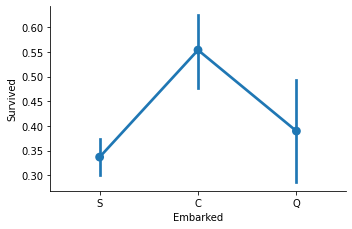

In [115]:
sns.factorplot(data=temp, x='Embarked', y='Survived')
fig = plt.gcf()
fig.set_size_inches(5,3)

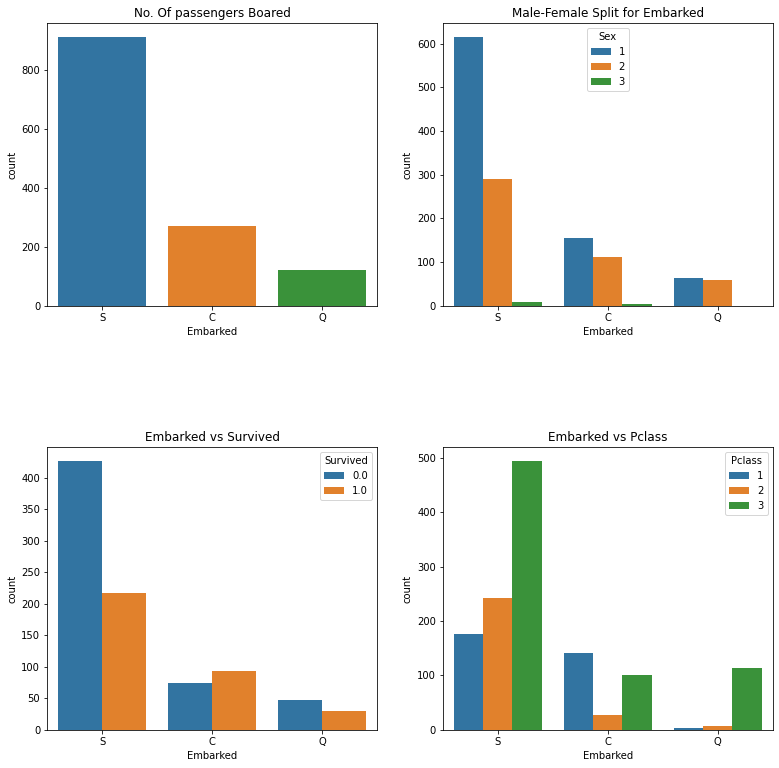

In [121]:
f, ax = plt.subplots(2,2, figsize=(13,13))

sns.countplot('Embarked', data=temp, ax=ax[0,0])
ax[0,0].set_title('No. Of passengers Boared')
sns.countplot('Embarked', hue='Sex', data=temp, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=temp, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=temp, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [122]:
temp.loc[(temp['Embarked'].isnull())]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Ticket,Initial,Age_Range,Agroup,Alone,Initick,NumTicket,Fare_Range,Fgroup,Inicab
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,2,0,...,113572,4,"(33.0, 39.0]",36,1.0,NaN,-1,"(77.958, 512.329]",9,8
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,2,0,...,113572,5,"(48.0, 80.0]",60,1.0,NaN,-1,"(77.958, 512.329]",9,8


In [132]:
temp.loc[(temp['Ticket']=='113572')]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Ticket,Initial,Age_Range,Agroup,Alone,Initick,NumTicket,Fare_Range,Fgroup,Inicab
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,2,0,...,113572,4,"(33.0, 39.0]",36,1.0,NaN,-1,"(77.958, 512.329]",9,8
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,2,0,...,113572,5,"(48.0, 80.0]",60,1.0,NaN,-1,"(77.958, 512.329]",9,8


In [134]:
temp.sort_values(['Ticket'], ascending=True)[55:70]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Ticket,Initial,Age_Range,Agroup,Alone,Initick,NumTicket,Fare_Range,Fgroup,Inicab
54,65.000000,B30,C,61.9792,"Ostby, Mr. Engelhart Cornelius",1,55,1,1,0,...,113509,2,"(48.0, 80.0]",60,NaN,NaN,-1,"(39.688, 77.958]",8,8
351,32.252151,C128,S,35.0000,"Williams-Lambert, Mr. Fletcher Fellows",0,352,1,1,0,...,113510,2,"(30.0, 32.252]",33,1.0,NaN,-1,"(27.0, 39.688]",7,1
252,62.000000,C87,S,26.5500,"Stead, Mr. William Thomas",0,253,1,1,0,...,113514,2,"(48.0, 80.0]",60,1.0,NaN,-1,"(21.679, 27.0]",6,1
829,62.000000,B28,NaN,80.0000,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,2,0,...,113572,5,"(48.0, 80.0]",60,1.0,NaN,-1,"(77.958, 512.329]",9,8
61,38.000000,B28,NaN,80.0000,"Icard, Miss. Amelie",0,62,1,2,0,...,113572,4,"(33.0, 39.0]",36,1.0,NaN,-1,"(77.958, 512.329]",9,8
802,11.000000,B96 B98,S,120.0000,"Carter, Master. William Thornton II",2,803,1,1,1,...,113760,4,"(0.169, 16.0]",13,NaN,NaN,-1,"(77.958, 512.329]",9,8
390,36.000000,B96 B98,S,120.0000,"Carter, Mr. William Ernest",2,391,1,1,1,...,113760,2,"(33.0, 39.0]",36,NaN,NaN,-1,"(77.958, 512.329]",9,8
435,14.000000,B96 B98,S,120.0000,"Carter, Miss. Lucile Polk",2,436,1,2,1,...,113760,4,"(0.169, 16.0]",13,NaN,NaN,-1,"(77.958, 512.329]",9,8
763,36.000000,B96 B98,S,120.0000,"Carter, Mrs. William Ernest (Lucile Polk)",2,764,1,2,1,...,113760,5,"(33.0, 39.0]",36,NaN,NaN,-1,"(77.958, 512.329]",9,8
185,32.252151,A32,S,50.0000,"Rood, Mr. Hugh Roscoe",0,186,1,1,0,...,113767,2,"(30.0, 32.252]",33,1.0,NaN,-1,"(39.688, 77.958]",7,6


In [135]:
temp.loc[(temp['Embarked'].isnull()), 'Embarked'] = 'S' 

In [136]:
temp['Embarked'].isnull().sum()

0

In [137]:
temp[(temp['Embarked'].isnull())]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Ticket,Initial,Age_Range,Agroup,Alone,Initick,NumTicket,Fare_Range,Fgroup,Inicab


In [139]:
temp['Embarked'] = temp['Embarked'].factorize()[0]

In [141]:
temp['Embarked'].factorize()[0]

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [142]:
temp['Embarked'].factorize()

(array([0, 1, 0, ..., 0, 0, 1], dtype=int64),
 Int64Index([0, 1, 2], dtype='int64'))

In [143]:
survpct('Initial')

Initial
1    0.000000
2    0.156069
3    0.454545
4    0.675676
5    0.792000
6    1.000000
Name: Survived, dtype: float64

In [145]:
temp.groupby('Initial')['Survived'].mean()

Initial
1    0.000000
2    0.156069
3    0.454545
4    0.675676
5    0.792000
6    1.000000
Name: Survived, dtype: float64

In [146]:
temp['Priority'] = 0
temp.loc[(temp['Initial'] == 6), 'Priority'] = 1
temp.loc[(temp['Pclass'] == 1) & (temp['Sex'] == 2), 'Priority'] = 2
temp.loc[(temp['Age'] < 1), 'Priority'] = 3
temp.loc[(temp['Pclass'] == 1) & (temp['Age'] <= 17), 'Priority'] = 4
temp.loc[(temp['Pclass'] == 2) & (temp['Age'] <= 17), 'Priority'] = 5
temp.loc[(temp['Pclass'] == 2) & (temp['Sex'] == 2), 'Priority'] = 6
temp.loc[(temp['Fgroup'] == 9), 'Priority'] = 7

In [147]:
temp['FH'] = 0
temp.loc[(temp['Sex'] == 1), 'FH'] = 0
temp.loc[(temp['Sex'] == 2), 'FH'] = 1
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 2), 'FH'] = 2
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 3), 'FH'] = 3
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 4), 'FH'] = 4
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 1) & (temp['Pclass'] == 1), 'FH'] = 5
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 1) & (temp['Pclass'] == 2), 'FH'] = 6
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] == 3), 'FH'] = 7
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] >= 5), 'FH'] = 8

KeyError: 'Family'

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn. neighnors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BotingClassifier

from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn import model_selection

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform()
X_test = scaler.fit_transform()

In [ ]:
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier()
gbc = GradientBoostingClassifier()
svc = SVC(probability=True)
ext = ExtraTreesClassifier()
ada = AdaBoostingClassifier()
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier()

models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]
model_names = ['Random Forest', 'K Nearest Neighnour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier']
scores = {}
               
for ind, mod in enumerate(models):
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring="accuracy", cv=10)
    scores[model_names[ind]] = acc

In [ ]:
results = pd.DataFrame(scores).T
results['mean'] = results.mean(1)

result_df = results.sort_values(by='mean', ascending=True)

In [ ]:
result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')


In [ ]:
def importance_plotting(data, xlabel, ylabel, title, n=20):
    sns.set(style="whitegrid")
    ax = data.tail(n).plot(kind='barh')
    
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
    plt.show()

In [ ]:
fi = {'Features':train.columns.tolist(), 'Importance':xgb.feature_importances_}
importance = pd.DataFrame(fi, indexfi['Features']).sort_values('Importance', ascending=True)

In [ ]:
fi = {'Features':train.columns.tolist(), 'Importance':np.transpose(log.coef_[0])}